Generate the term frequency (reference venue) from a set of paper information

In [1]:
# Extensions
%load_ext autoreload
%autoreload 2

In [2]:
# Imports
import scipy
import scipy.sparse    as sparse
import numpy           as np

from core.search.query_paper_mag import paper_mag_multiquery
from core.search.query_info      import paper_info_mag_check_multiquery
from core.utils.entity_type      import Entity_type

from bag_of_venues import BagOfVenues
from plotting import *
from utils    import *

In [3]:
# Conf id
conf_id = 1127352206 #PLDI

# Generate papers for the conference
papers = paper_mag_multiquery(Entity_type.CONF, [conf_id])

print("Papers for conference:", len(papers))

# Import paper information here!
paper_informations = paper_info_mag_check_multiquery(papers)

return statue: 403
{'Ocp-Apim-Subscription-Key': '004967a3daac4bf683e16ca2a459de07'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'ce7734c51f504dcaa1dd89cb88fa153d'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': '004967a3daac4bf683e16ca2a459de07'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'ce7734c51f504dcaa1dd89cb88fa153d'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be reple

In [4]:
bov = BagOfVenues()
bov.fit(paper_informations)

In [5]:
print(bov.emb_matrix.toarray())
print(bov.obj_dim, bov.emb_dim)
print(np.sum(bov.emb_matrix.toarray()))

[[1 2 1 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
1186 1024
28209


In [6]:
title1 = 'memsat checking axiomatic specifications of memory models'
title2 = 'mechanized verification of fine grained concurrent programs'

In [7]:
bov.title_to_vec(title1)

array([0, 1, 1, ..., 0, 0, 0])

In [8]:
bov.sim_titles(title1, title2)

0.36583339522585784

In [9]:
bov.most_sim(bov.title_to_vec(title1))

[{'idx': 371,
  'obj': 'memsat checking axiomatic specifications of memory models',
  'sim': 1.0000000000000002},
 {'idx': 126,
  'obj': 'synthesizing software verifiers from proof rules',
  'sim': 0.7089306854261541},
 {'idx': 348,
  'obj': 'dynamic partial order reduction for relaxed memory models',
  'sim': 0.7056422850727971},
 {'idx': 216,
  'obj': 'discovering properties about arrays in simple programs',
  'sim': 0.6857254813237417},
 {'idx': 467,
  'obj': 'herding cats modelling simulation testing and data mining for weak memory',
  'sim': 0.6754836711711946}]

In [10]:
bov.most_sim(bov.title_to_vec(title2))

[{'idx': 501,
  'obj': 'mechanized verification of fine grained concurrent programs',
  'sim': 1.0},
 {'idx': 987,
  'obj': 'atomicity refinement for verified compilation',
  'sim': 0.86350607762354},
 {'idx': 677,
  'obj': 'blame and coercion together again for the first time',
  'sim': 0.8617274844321392},
 {'idx': 135,
  'obj': 'adoption and focus practical linear types for imperative programming',
  'sim': 0.8251126821451},
 {'idx': 792,
  'obj': 'monadic abstract interpreters',
  'sim': 0.8124444637023874}]

In [27]:
auth_vec = bov.author_to_vec('stephen m blackburn')
auth_vec

[array([0, 3, 0, ..., 0, 0, 0]), array([0, 8, 0, ..., 0, 0, 0]), array([2, 3, 0, ..., 0, 0, 0]), array([2, 2, 1, ..., 0, 0, 0])]


array([ 4, 16,  1, ...,  0,  0,  0])

In [12]:
for res in bov.most_sim(auth_vec):
    print('sim:', res['sim'], ', obj:', res['obj'][:80])

sim: 0.9458490602925756 , obj: beltway getting around garbage collection gridlock
sim: 0.93887134688203 , obj: immix a mark region garbage collector with space efficiency fast collection and 
sim: 0.9235948757944468 , obj: the compressor concurrent incremental and parallel compaction
sim: 0.9039360825220187 , obj: free me a static analysis for automatic individual object reclamation
sim: 0.896380999278975 , obj: z rays divide arrays and conquer speed and flexibility


In [13]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler(with_mean=False)
scaler = scaler.fit(bov.emb_matrix)

pca = TruncatedSVD(n_components=2)
pca.fit(scaler.transform(bov.emb_matrix))

author_names = ['stephen m blackburn', 'kathryn s mckinley',
                'james bornholt', 'julian dolby', 'mandana vaziri',
                'perry cheng']

/mnt/u5642715/miniconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
auth_vecs   = bov.authors_to_vec(author_names)
auth_matrix = np.zeros((len(auth_vecs), bov.emb_dim))
auth_list   = list()
vec_list    = list()
for i, a_vec in enumerate(auth_vecs.items()):
    auth, vec = a_vec
    auth_list.append(auth)
    vec_list.append(vec)
    auth_matrix[i] = vec

auth_pca_matrix = pca.transform(scaler.transform(auth_matrix))

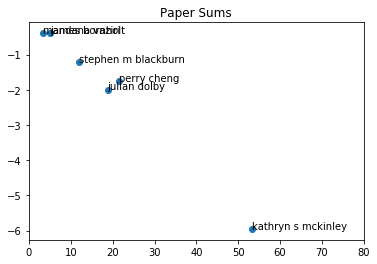

In [17]:
x = auth_pca_matrix[:,0]
y = auth_pca_matrix[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim([0, 80])
ax.set_title('Paper Sums')
for i, name in enumerate(auth_list):
    ax.annotate(name, (x[i], y[i]))

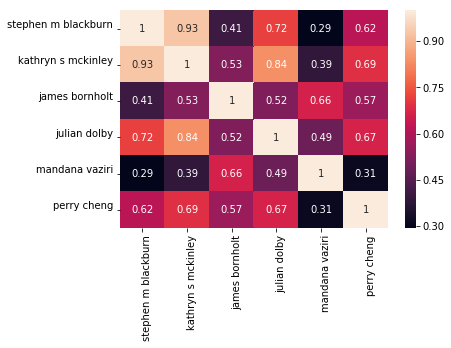

In [18]:
sim_matrix = gen_cmp_matrix(vec_list)

cmp_plot(sim_matrix, auth_list, plt)

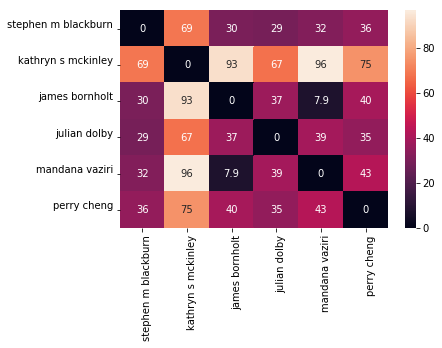

In [19]:
dist_matrix = gen_cmp_matrix(vec_list, calc=lambda x,y: np.linalg.norm(x-y))

cmp_plot(dist_matrix, auth_list, plt)

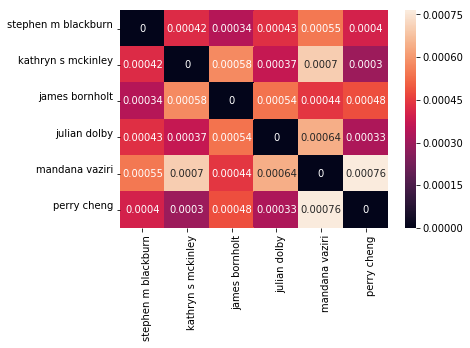

In [20]:
emd = lambda x, y: scipy.stats.wasserstein_distance(x/x.sum(), y/y.sum())
#emd_matrix = gen_cmp_matrix(vec_list, calc=scipy.stats.wasserstein_distance)
emd_matrix = gen_cmp_matrix(vec_list, calc=emd)

cmp_plot(emd_matrix, auth_list, plt)

In [21]:
auth_vecs   = bov.authors_to_vec(author_names, scoring='avg')
auth_matrix = np.zeros((len(auth_vecs), bov.emb_dim))
auth_list   = list()
vec_list    = list()
for i, a_vec in enumerate(auth_vecs.items()):
    auth, vec = a_vec
    auth_list.append(auth)
    vec_list.append(vec)
    auth_matrix[i] = vec

auth_pca_matrix = pca.transform(scaler.transform(auth_matrix))

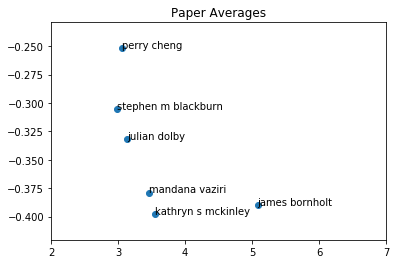

In [22]:
x = auth_pca_matrix[:,0]
y = auth_pca_matrix[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('Paper Averages')
ax.set_xlim([2, 7])
for i, name in enumerate(auth_list):
    ax.annotate(name, (x[i], y[i]))

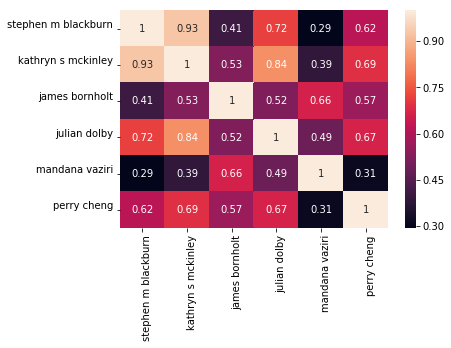

In [23]:
sim_matrix = gen_cmp_matrix(vec_list)

cmp_plot(sim_matrix, auth_list, plt)

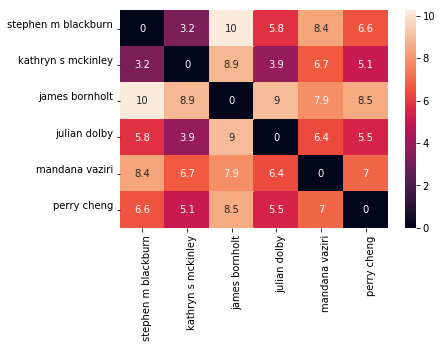

In [24]:
dist_matrix = gen_cmp_matrix(vec_list, calc=lambda x,y: np.linalg.norm(x-y))

cmp_plot(dist_matrix, auth_list, plt)

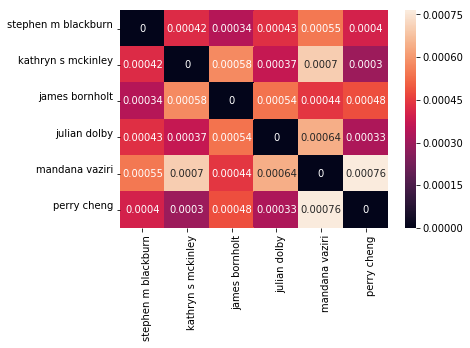

In [25]:
emd = lambda x, y: scipy.stats.wasserstein_distance(x/x.sum(), y/y.sum())
emd_matrix = gen_cmp_matrix(vec_list, calc=scipy.stats.wasserstein_distance)
emd_matrix = gen_cmp_matrix(vec_list, calc=emd)

cmp_plot(emd_matrix, auth_list, plt)